In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split,cross_val_score,KFold,ShuffleSplit
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler


plt.rcParams.update({'font.size':14})
plt.rcParams.update({"font.family" : "Times new roman"})

# Import The Limited Power Dataset

In [46]:
df=pd.read_csv(r'H:\Solar_panel_IFD\PreProcessed Data\Lim_solar_data.csv')


df.head()

,Time,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,label
0,0.000028,1.572327,101.348877,144.140625,-0.135133,0.490112,-0.354985,41.744537,-149.872894,109.064585,1.000000,50.000000,1.000000,50.000000,F0L
1,0.010027,1.539215,101.251221,143.261719,0.086425,-0.490112,0.349971,-42.311096,149.029083,-108.377482,1.000000,50.000000,1.000000,50.000000,F0L
2,0.020026,1.637604,101.031494,143.554688,-0.155274,0.469971,-0.307988,41.515503,-149.933167,109.104767,1.000000,50.000000,1.000000,50.000000,F0L
3,0.030025,1.577057,101.287842,142.968750,0.106566,-0.456543,0.336543,-42.106171,150.222473,-109.249420,0.461228,49.921509,151.655756,50.078264,F0L
4,0.040024,1.613007,101.049805,143.847656,-0.155274,0.456543,-0.314702,41.370850,-150.162201,109.245402,0.311221,49.594346,154.027080,50.193078,F0L


# Divide the dataset into Train-test split  and do the standard scalling

In [47]:
def split_transform(df,split_ratio):
    X=df.iloc[:,1:-1]
    Y=df.iloc[:,-1]
    X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=split_ratio,shuffle=True)

    scaler=StandardScaler()
    X_sc_train = scaler.fit_transform(X_train)
    X_sc_test = scaler.transform(X_test)

    print("The number of samples in the Training set is {}".format(len(X_sc_train)))
    print("The number of samples in the Test set is {}".format(len(X_sc_test)))
    
    return  X_sc_train, X_sc_test,y_train,y_test,scaler

# Do Model training

In [51]:
def Model_with_cross_val(df,clf,k_fold,test_size):
    # Split transform the data
    X_sc_train, X_sc_test,y_train,y_test,scaler = split_transform(df,split_ratio=0.01)
    print("")
    
    #Generate k-fold with shuffled split
    cv = ShuffleSplit(n_splits=k_fold, test_size=test_size)
    
    # get score for each split
    scores = cross_val_score(clf, X_sc_train,y_train, cv=cv, n_jobs=-1)
    
    #print scores with mean and std
    print(scores)
    
    print("{} accuracy with a standard deviation of {}".format(np.mean(scores),np.std(scores)))
    print("")




# Random Forest

In [52]:
clf = RandomForestClassifier()
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)

The number of samples in the Training set is 10825
The number of samples in the Test set is 110

[0.97598522 0.97444581 0.97937192 0.97783251 0.98183498]
0.9778940886699508 accuracy with a standard deviation of 0.002578865959528537



# Decision Trees

In [53]:
clf = DecisionTreeClassifier()
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)

The number of samples in the Training set is 10825
The number of samples in the Test set is 110

[0.94735222 0.9510468  0.95628079 0.94642857 0.94612069]
0.9494458128078819 accuracy with a standard deviation of 0.003842482946261741



# SVM

In [54]:
clf = SVC()
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)

The number of samples in the Training set is 10825
The number of samples in the Test set is 110

[0.94334975 0.94304187 0.93934729 0.94150246 0.94334975]
0.9421182266009852 accuracy with a standard deviation of 0.0015455542362082606



# KNN

In [55]:
clf = KNeighborsClassifier(n_neighbors=5)
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)

The number of samples in the Training set is 10825
The number of samples in the Test set is 110

[0.9510468  0.95843596 0.94396552 0.94365764 0.95628079]
0.950677339901478 accuracy with a standard deviation of 0.006100100665544565



# Logistic Reg

In [56]:
clf = LogisticRegression()
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)

The number of samples in the Training set is 10825
The number of samples in the Test set is 110

[0.67580049 0.69858374 0.67826355 0.69150246 0.68534483]
0.685899014778325 accuracy with a standard deviation of 0.008401055037286862



# Naive Byes

In [57]:
clf = GaussianNB()
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)

The number of samples in the Training set is 10825
The number of samples in the Test set is 110

[0.76077586 0.76169951 0.76939655 0.7737069  0.74784483]
0.7626847290640394 accuracy with a standard deviation of 0.008847302983084632



# Do prediction with best performing Model

In [58]:
Model.classes_

array(['F0L', 'F1L', 'F2L', 'F3L', 'F4L', 'F5L', 'F6L', 'F7L'],
      dtype=object)

The number of samples in the Training set is 8748
The number of samples in the Test set is 2187


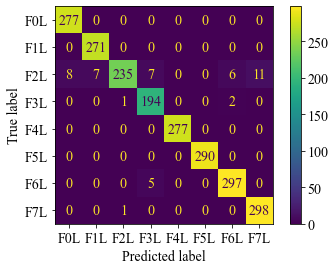

In [59]:
X_sc_train, X_sc_test,y_train,y_test,scaler = split_transform(df,split_ratio=0.2)

Model = RandomForestClassifier()
Model.fit(X_sc_train,y_train)



disp = ConfusionMatrixDisplay.from_estimator(
    Model,
    X_sc_test,
    y_test,
    display_labels=Model.classes_)





